In [1]:
%load_ext autoreload
%autoreload 2

#TODO : clean-up ce notebook pour qu'on garde que ce qui est nécessaire...

## Initialisation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from LogGabor import LogGabor
import torch
from torchvision import datasets, transforms
import os
import noise
import MotionClouds as mc

In [3]:
from Vision import *

Loading accuracy... min, max= 0.0145 0.9852


In [4]:
def randomized_perlin_noise(shape=(128, 128), scale=10, octaves=6, persistence=0.5, lacunarity=2.0, base=0):
    noise_vector = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            noise_vector[i][j] = noise.pnoise2(i/scale,
                                               j/scale,
                                               octaves=int(
                                                   octaves * abs(np.random.randn()))+1,
                                               persistence=persistence *
                                               abs(np.random.randn()),
                                               lacunarity=lacunarity *
                                               abs(np.random.randn()),
                                               repeatx=shape[0],
                                               repeaty=shape[1],
                                               base=base)

    return noise_vector

In [5]:
i_offset, j_offset = 15, 15

### MNIST_28

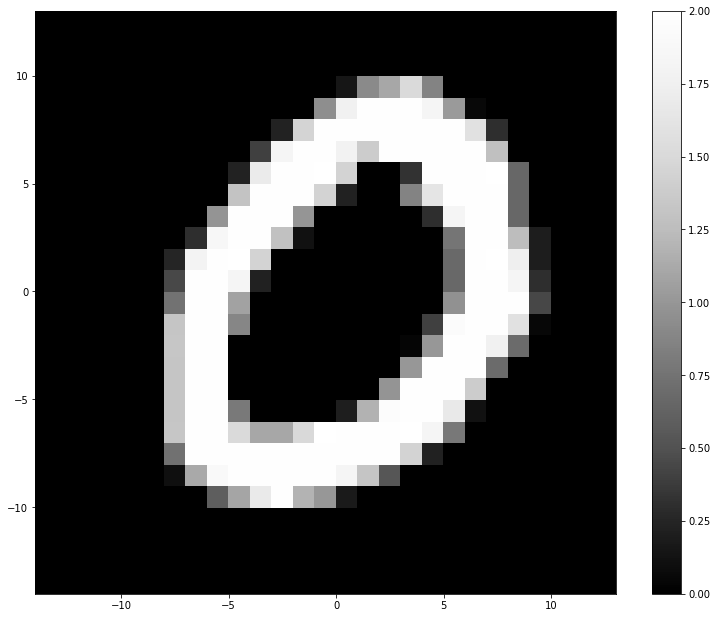

In [6]:
from Where import data_loader
path = 'MNIST_28.pdf'
N_pic = 28
for batch_idx, (data, target) in enumerate(data_loader):
    data_28 = data[-1][-1]
    fig, ax = plt.subplots(figsize=(13, 10.725))
    cmap = ax.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), np.flipud(data_28), cmap='Greys_r')
    fig.colorbar(cmap)
    #plt.savefig(path)
    break

### MNIST_128

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109a2e748>)

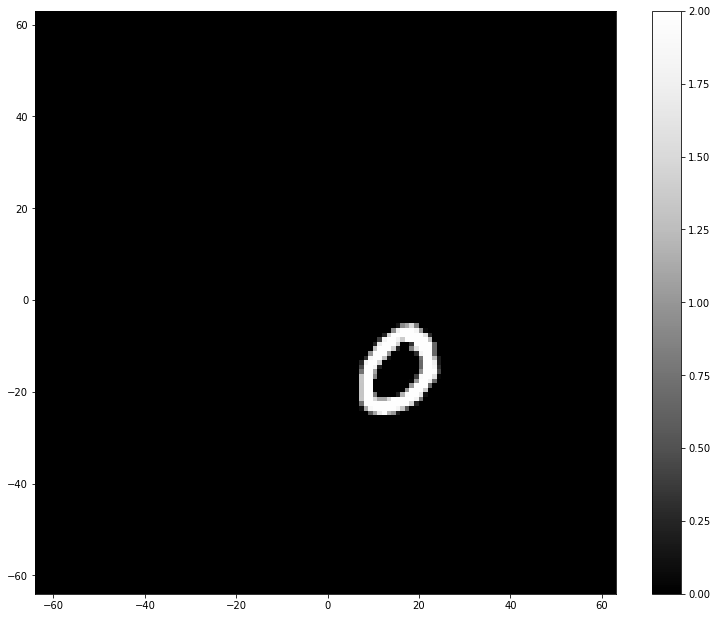

In [7]:
mnist_fullfield(data_28, i_offset, j_offset, figure_type='128')

### Bruit perlin

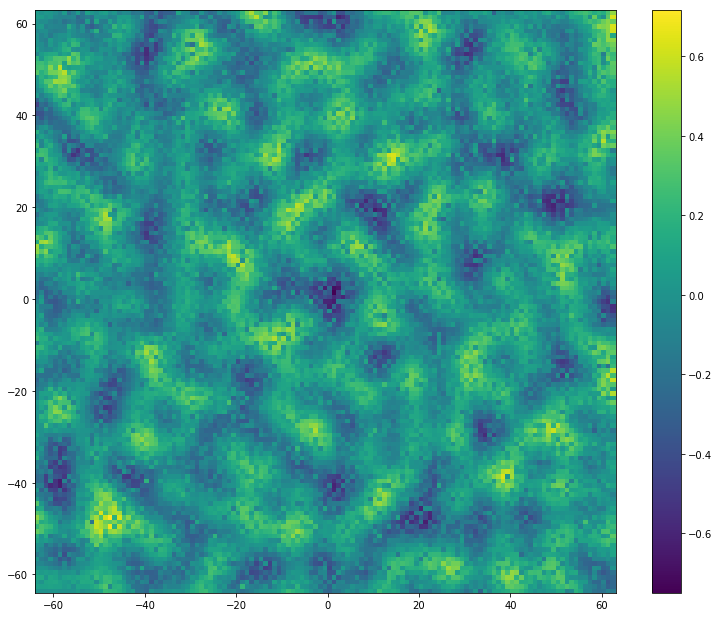

In [8]:
fig, ax = plt.subplots(figsize=(13, 10.725))
cmap = ax.pcolor(np.arange(-64, 64), np.arange(-64, 64), randomized_perlin_noise())
fig.colorbar(cmap)

### Bruit MotionCloud

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119396898>)

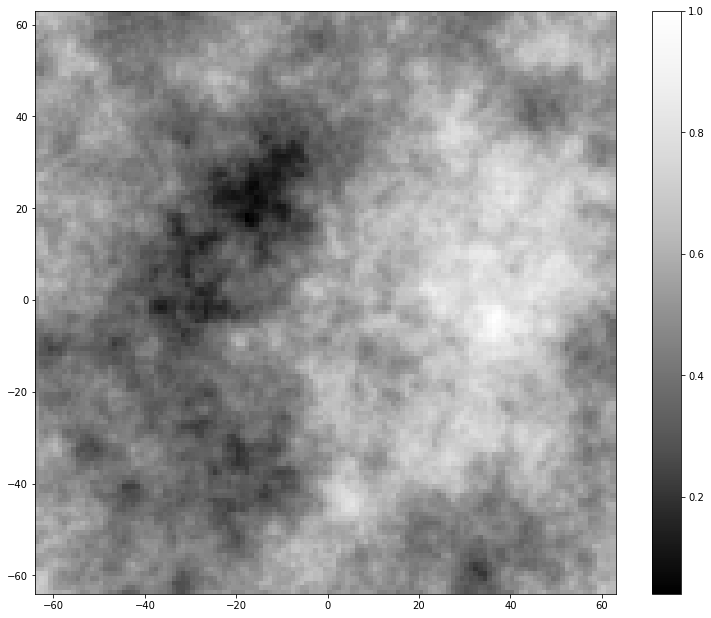

In [9]:
MotionCloudNoise(figure_type='cmap')

### Filtre LogPol classique

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11942aa58>)

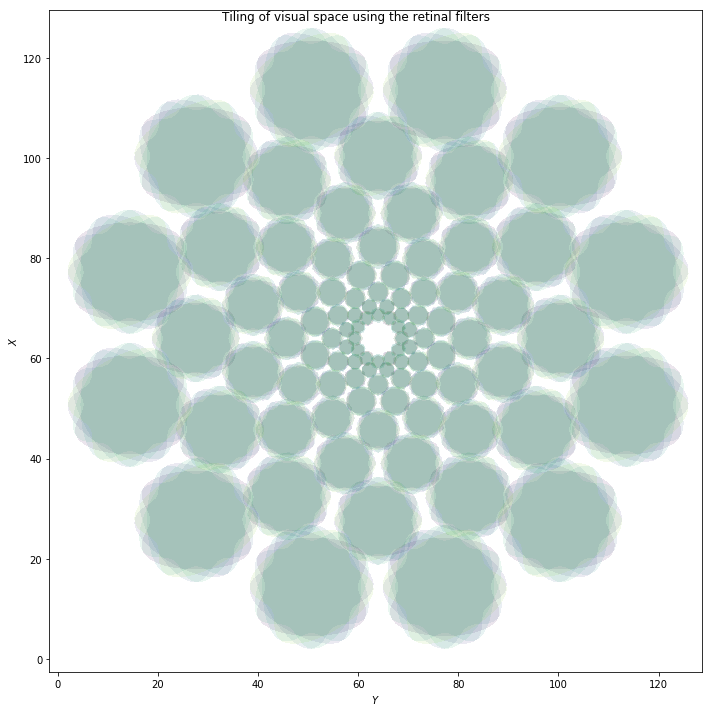

In [10]:
vectorization(figure_type='retina')

### Filtre LogPol classique + image

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119edeb38>)

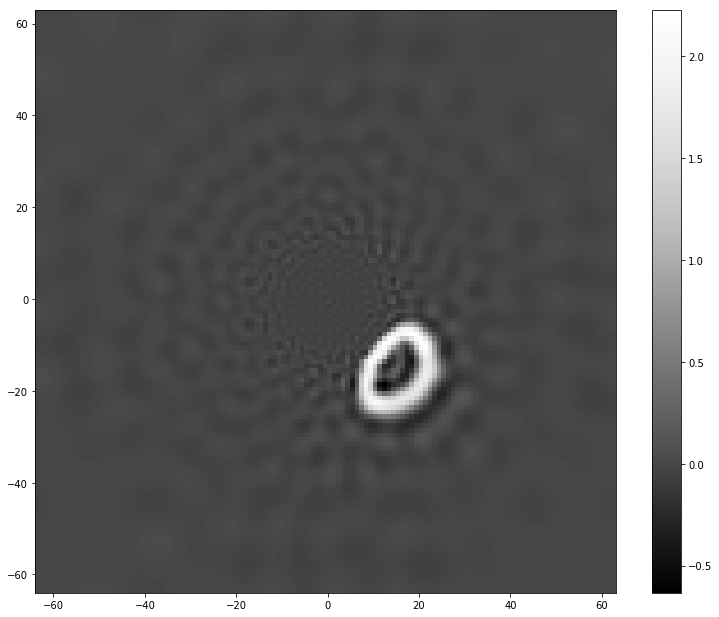

In [11]:
mnist_fullfield(data_28, i_offset, j_offset, figure_type='cmap')

### Filtre LogPol classique + image + bruit perlin

### Filtre LogPol classique + image + bruit MotionCloud

(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126344358>)

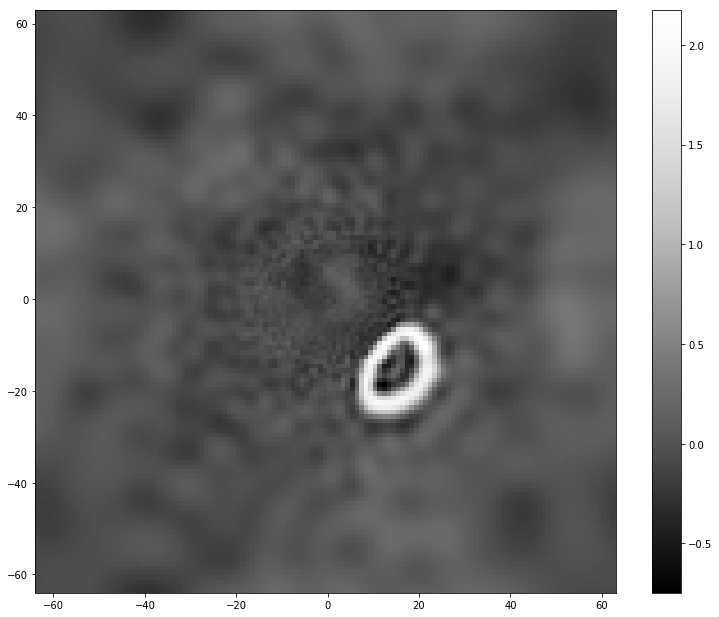

In [12]:
mnist_fullfield(data_28, i_offset, j_offset, noise=1., figure_type='cmap')
#plt.savefig('mnist_128_LP_MotionCloud.pdf')

### Filtre LogPolaire + image + MotionCloud (méthode alternative de déplacement de MNIST au sein de l'image)

### Filtre LogPol + orientations moyennées

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1264c4d30>)

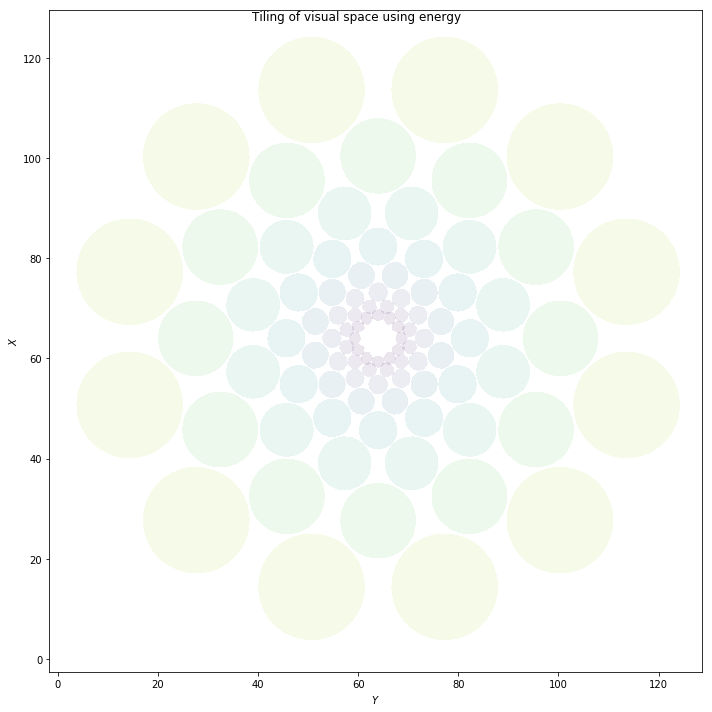

In [13]:
"""
colliculus = (retina**2).sum(axis=(0,3)) 
colliculus /= colliculus.sum(axis=-1)[:, :, None]
colliculus_vector = colliculus.reshape((N_azimuth*N_eccentricity, N_X*N_Y))
colliculus_inverse = np.linalg.pinv(colliculus_vector)

fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_WIDTH))
for i_azimuth in range(N_azimuth):
    for i_eccentricity in range(N_eccentricity):
        env = np.sqrt(colliculus[i_azimuth, i_eccentricity, :]**2.5).reshape((N_X, N_Y))
        ax.contour(colliculus[i_azimuth, i_eccentricity, :].reshape((N_X, N_Y)), levels=[env.max()/2], lw=1, colors=[plt.cm.viridis(i_theta/(N_theta))])
fig.suptitle('Tiling of visual space using energy')
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X$')
ax.axis('equal')
plt.tight_layout()
"""
vectorization(figure_type='colliculus')
#plt.savefig('logpol_energy_filter.pdf')

### Filtre LogPol + orientations moyennées + accuracy

Loading accuracy... min, max= 0.0145 0.9852


(<Figure size 936x772.2 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12695fef0>)

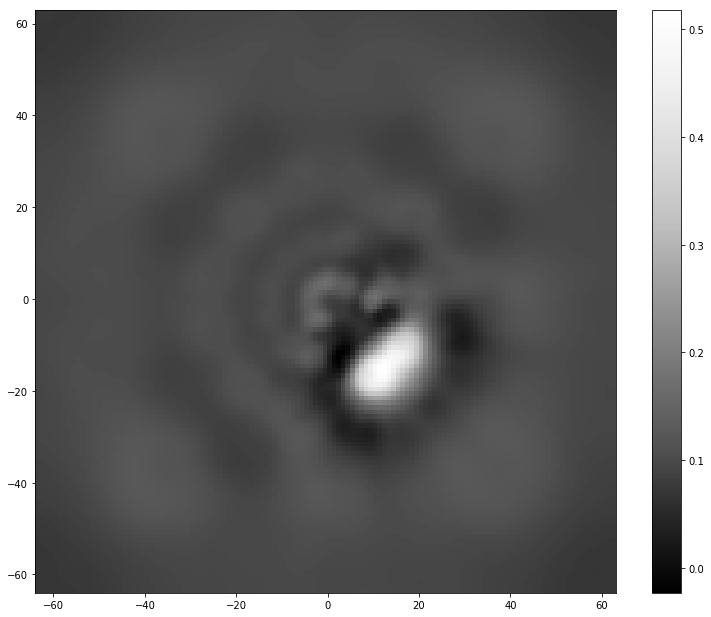

In [14]:
accuracy_fullfield(accuracy, i_offset, j_offset, figure_type='colliculus')

### Couples

#TODO: pour tester la fonction, il faudrait appeler ``couples``

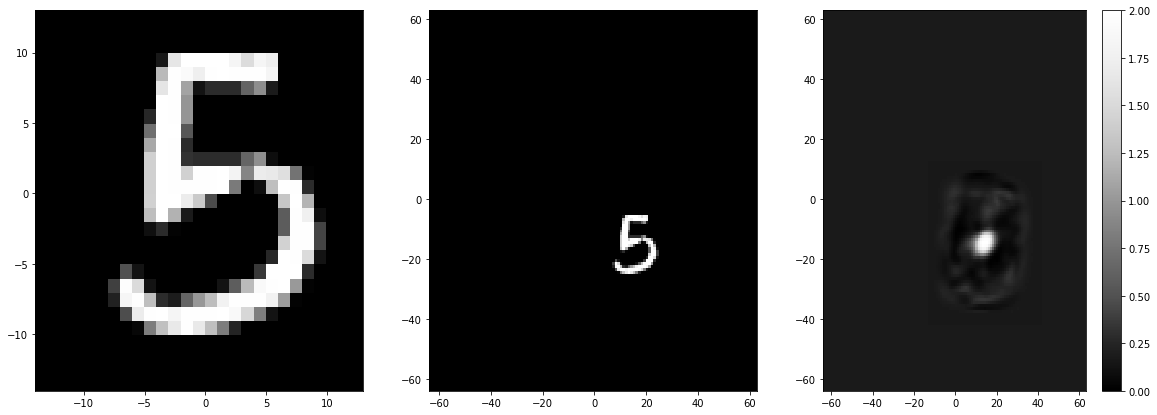

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))

N_pic = 28
for batch_idx, (data, target) in enumerate(data_loader):
    data_28 = data[-1][-1]
    cmap = ax1.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), np.flipud(data_28), cmap='Greys_r')
    fig.colorbar(cmap)
    break

N_stim = data_28.shape[0]
N_pic = 128
center = (N_pic-N_stim)//2
data_fullfield = (data_28.min().numpy()) * np.ones((N_pic, N_pic))
data_fullfield[int(center+i_offset):int(center+N_stim+i_offset), int(center+j_offset):int(center+N_stim+j_offset)] = data_28
cmap = ax2.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), np.flipud(data_fullfield), cmap='Greys_r')

N_stim = accuracy.shape[0]
center = (N_pic-N_stim)//2
accuracy_fullfield = 0.1 * np.ones((N_pic, N_pic))
accuracy_fullfield[int(center+i_offset):int(center+N_stim+i_offset), int(center+j_offset):int(center+N_stim+j_offset)] = accuracy
cmap = ax3.pcolor(np.arange(-N_pic/2, N_pic/2), np.arange(-N_pic/2, N_pic/2), np.flipud(accuracy_fullfield), cmap='Greys_r')

plt.savefig('couples_a-v.pdf')

### LogPolar view

In [20]:
mnist_fullfield(data_28, i_offset, j_offset, noise=False, figure_type='log')
plt.savefig('mnist_log_nonoise.pdf')

Loading accuracy... min, max= 0.0145 0.9852


ValueError: cannot reshape array of size 1152 into shape (72,16,16384)

### LogPolar view + noise

In [ ]:
mnist_fullfield(data_28, i_offset, j_offset, figure_type='log')
plt.savefig('mnist_log_motioncloud.pdf')

## Evaluation

In [1]:
from Where import *

Loading accuracy... min, max= 0.0145 0.9852
n_hidden1 80  / n_hidden2 200


In [2]:
path = '2018-06-07_classification_BCELoss.pt'
path = '2018-05-23_classification_BCELoss.pt'

In [3]:
!ls -l {path}

-rw-rw-r-- 1 pierre pierre 511993 juin   7 10:12 2018-05-23_classification_BCELoss.pt


In [4]:
print('Loading file', path)

net.load_state_dict(torch.load(path))

Loading file 2018-05-23_classification_BCELoss.pt


Stimulus position: (0,-8)
Position prediction: (-1.0,-9.0)
Stimulus position: (2,-1)
Position prediction: (2.0,-5.0)
Stimulus position: (6,-4)
Position prediction: (7.0,-2.0)


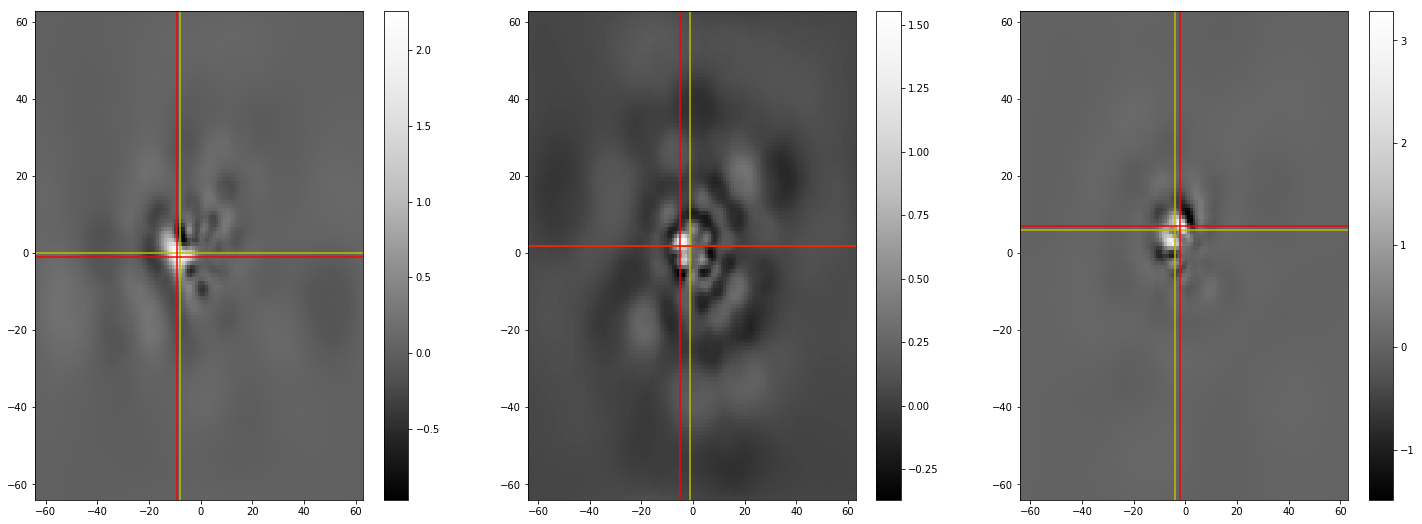

In [21]:
vsize=N_theta*N_azimuth*N_eccentricity*N_phase
asize=N_azimuth*N_eccentricity
N_pic=N_X
offset_std=10 
offset_max=25
save=True
num_ = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,9))
d = {0:ax1,1:ax2, 2:ax3}

for batch_idx, (data, label) in enumerate(data_loader):

    i_offset = minmax(np.random.randn()*offset_std, offset_max)
    j_offset = minmax(np.random.randn()*offset_std, offset_max)
    print('Stimulus position: ({},{})'.format(i_offset, j_offset))


    input_, a_data = np.zeros((1, 1, vsize)), np.zeros((1, 1, asize))
    input_[0, 0, :], a_data[0, 0, :] = couples(data[0, 0, :], i_offset, j_offset)

    input_ = Variable(torch.FloatTensor(input_))
    a_data = Variable(torch.FloatTensor(a_data))

    prediction = net(input_)
    pred_data = prediction.data.numpy()[-1][-1]

    image = colliculus_inverse @ pred_data
    image_reshaped = image.reshape(N_pic, N_pic)

    ax = d[num_]
    cmap = ax.pcolor(np.arange(-(N_pic/2), (N_pic/2)),
                     np.arange(-(N_pic/2), (N_pic/2)), image_reshaped, 
                     cmap='Greys_r')
    
    fig.colorbar(cmap, ax=ax)
    ax.axvline(j_offset, c='y')
    ax.axhline(i_offset, c='y')

    for i_pred in range(0, N_pic):
        for j_pred in range(0, N_pic):
            
            if image_reshaped[i_pred][j_pred] == image_reshaped.max():
                
                i_hat, j_hat = i_pred-(N_pic/2), j_pred-(N_pic/2)
                
                print('Position prediction: ({},{})'.format(i_hat, j_hat))
                
                ax.axvline(j_hat, c='r')
                ax.axhline(i_hat, c='r')
                
                if save: plt.savefig('prediction.pdf') 
                    
    num_ += 1
    if num_ == 3: break

In [8]:
d = {0:ax1,1:'ax2', 2:'ax3'}
for k in range(3):
    print(d[k])

AxesSubplot(0.125,0.125;0.227941x0.755)
ax2
ax3
